### Saliency map

https://raghakot.github.io/keras-vis/visualizations/saliency/

Categorical Dense layer visualization - contribute most towards activating the corresponding output nodes

Conv filter saliency - visualize parts of the image that influence the filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras import activations

from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations


Using TensorFlow backend.


In [2]:
# model configuration 

NUM_CLASSES = 2
IMG_WI = 224
IMG_HI = 224


In [4]:
# load processed data for training 

hello = np.load('processed_hello.npy')
no_hello = np.load('processed_no_hello.npy')


In [5]:

def cnn_model():
    model = Sequential()
    
    # zero padding
    model.add(Conv2D(32, (3, 3), padding = 'same', input_shape = (IMG_WI, IMG_HI, 3), activation = 'relu'))
    model.add(Conv2D(32, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(128, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(NUM_CLASSES, activation = 'softmax', name = 'preds'))
    
    return model


In [13]:
# load the model

model = cnn_model()
model.load_weights('./saved_models/model_high_dropout.h5')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 111, 111, 64)      18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
__________

#### Categorical Dense layer visualization

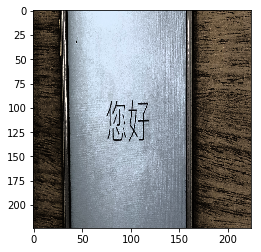

In [9]:
# pick a random picture from all processed hello pictures 

idx = 3
plt.imshow(hello[idx])


/Users/yueying.teng/miniconda3/lib/python3.6/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


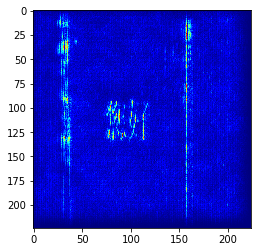

In [8]:

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'preds')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# set filter_indices for the desired output category
class_idx = [1, 0]
grads = visualize_saliency(model, layer_idx, filter_indices = class_idx, backprop_modifier = 'relu', seed_input = hello[idx])
# Plot with 'jet' colormap to visualize as a heatmap.
plt.imshow(grads, cmap='jet')


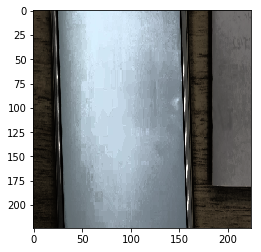

In [12]:
# for pictures without hello 
# original picture 
plt.imshow(no_hello[idx])


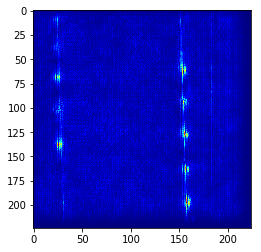

In [11]:

class_idx = [0, 1]
grads = visualize_saliency(model, layer_idx, filter_indices = class_idx, backprop_modifier = 'relu', seed_input = no_hello[idx])
# Plot with 'jet' colormap to visualize as a heatmap.
plt.imshow(grads, cmap='jet')



#### Conv filter saliency

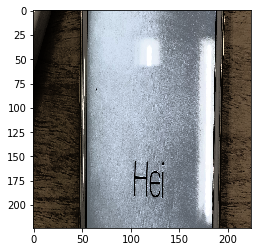

In [38]:
idx = 67

plt.imshow(hello[idx])

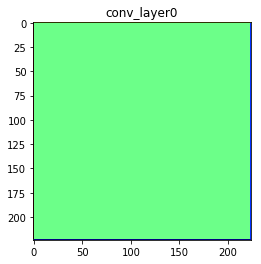

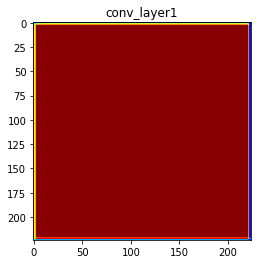

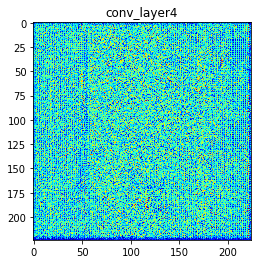

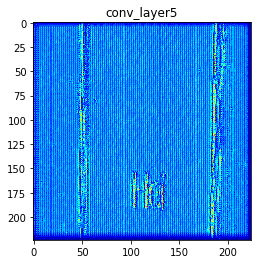

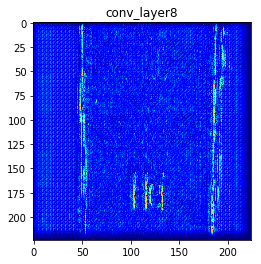

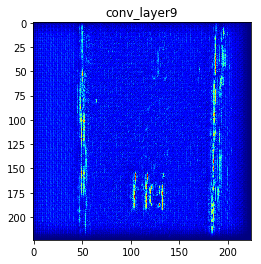

In [41]:
# plot filter saliency of all conv layer 

layers = model.layers 
# get all conv layer indices
all_conv_index = [index for index, layer in enumerate(layers) if type(layer) is Conv2D]

# filter_indices refers to the index of the Conv filter within the layer 
class_idx = [1, 0]

# point layer_idx to Conv layer - what a filter cares about - index of the second last conv layer 

for i in all_conv_index:
    layer_idx = i
   
    # saliency of current conv layer filter 
    grads = visualize_saliency(model, layer_idx, filter_indices = class_idx, backprop_modifier = 'relu', seed_input = hello[idx])
    
    # Plot with 'jet' colormap to visualize as a heatmap.
    plt.figure()
    plt.imshow(grads, cmap='jet')
    plt.title('conv_layer' + str(i))
    